# 1. Problem Statement

>- On April 15, 1912, during maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.
>***
>- While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.
>***
>-  I am going to **build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data** (i.e PassengerId, Survived, Passenger class, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked).
***
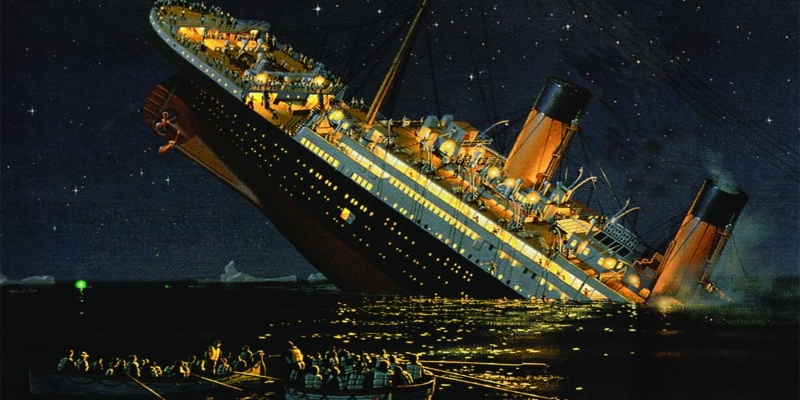
***
> **Column Names:**
>- PassengerId - An index Column
>- survived - Survival (0 = No; 1 = Yes)
>- Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
>- name - Name
>- sex - male/female
>- age - Age
>- sibsp - Number of Siblings/Spouses Aboard
>- parch - Number of Parents/Children Aboard
>- ticket - Ticket Number
>- fare - Passenger Fare
>- cabin - Cabin
>- embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = > Southampton)

# 2. Loading Libraries and Dataset

In [10]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# for hiding warning
import warnings
warnings.filterwarnings('ignore')

In [11]:
#Loading titanic CSV file
df = pd.read_csv("titanic.csv")

#  3. Describing data

In [12]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 3.1 Features in dataset

In [13]:
#Columns present in dataset
print(df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


>- **Categorical Features** : Survived, Sex, and Embarked. 
>    - Ordinal: Pclass.
>- **Continous Features** : Age, Fare. 
>    - Discrete: SibSp, Parch.
>- Ticket and Cabin are of alphanumeric data type.

In [14]:
# No.of rows and columns
df.shape

(891, 12)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


>- Cabin, Age, Embarked features contain a number of null values.
>- Seven features are integer or floats.
>- Five features are strings (object).

### 3.2 Distribution of numerical feature

In [16]:
# Distribution of numerical feature values across the samples
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


>- Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).
>- Survived is a categorical feature with 0 or 1 values.
>- Around 38% samples survived representative of the actual survival rate at 32%.
>- Most passengers (> 75%) did not travel with parents or children.
>- Fares varied significantly with few passengers paying as high as $512.
>- Few elderly passengers within age range 65-80.

### 3.3 Distribution of Categorical feature

In [17]:
# distribution of categorical features
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Jacobsohn, Mr. Sidney Samuel",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


>- Names are unique across the dataset
>- Sex variable as two possible values with 65% male (top=male, freq=577, count=891).
>- Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
>- Embarked takes three possible values. S port used by most passengers (top=S)
>- Ticket feature has high ratio (22%) of duplicate values (unique=681).

### 3.4 Correlation with survival

In [18]:
# Checking correlation with survival
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [19]:
df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [20]:
df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [21]:
df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


>- Pclass We observe significant correlation (>0.5) among Pclass=1 and Survived. We decide to include this feature in our model.
>- Sex We confirm the observation during problem definition that Sex=female had very high survival rate at 74%.
>- SibSp and Parch These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features.

# 4. Data Visualization

Text(0.5, 1.0, 'Survived Distribution')

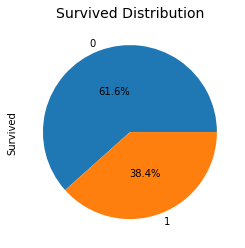

In [22]:
data_survived = df.Survived.value_counts()
data_survived.plot.pie(autopct="%.1f%%", pctdistance=0.5)
plt.title("Survived Distribution", fontsize=14)

>- Majority of the people are female

## 4.1 Correlating numerical features

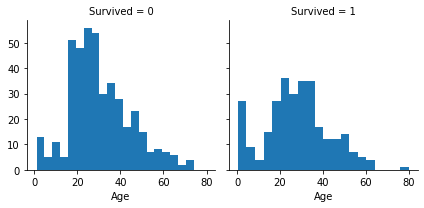

In [23]:
# A histogram chart is useful for analyzing continous numerical variables like Age where banding 
# or ranges will help identify useful patterns
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

>- Infants (Age <=4) had high survival rate.
>- Oldest passengers (Age = 80) survived.
>- Large number of 15-25 year olds did not survive.
>- Most passengers are in 15-35 age range.
> ***
>- We should consider Age in our model training.
>- Complete the Age feature for null values.
>- We should band age groups.

## 4.2 Correlating numerical and ordinal features

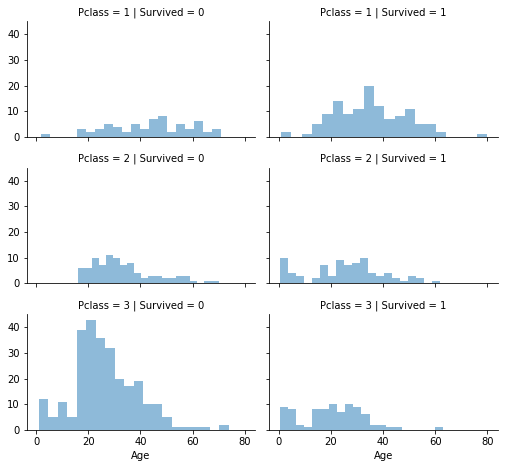

In [24]:
grid = sns.FacetGrid(df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

>- Pclass=3 had most passengers, however most did not survive.
>- Infant passengers in Pclass=2 and Pclass=3 mostly survived.
>- Most passengers in Pclass=1 survived.
>- Pclass varies in terms of Age distribution of passengers.
>- So Pclass is an important feature for modelling

## 4.3 Correlating categorical features

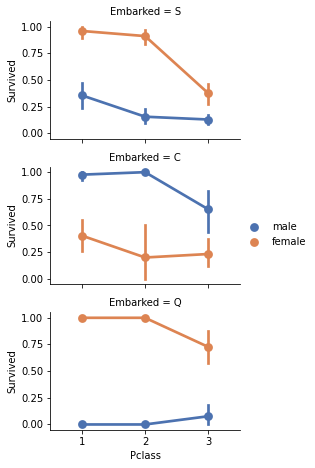

In [25]:
grid = sns.FacetGrid(df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

>- Female passengers had much better survival rate than males.
>- Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.
>- Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports. 
>- Ports of embarkation have varying survival rates for Pclass=3 and among male passengers.
>***
>- So we should add Sex feature to model training.
>- Also we need to complete and add Embarked feature to model training.

## 4.4 Correlating categorical and numerical features

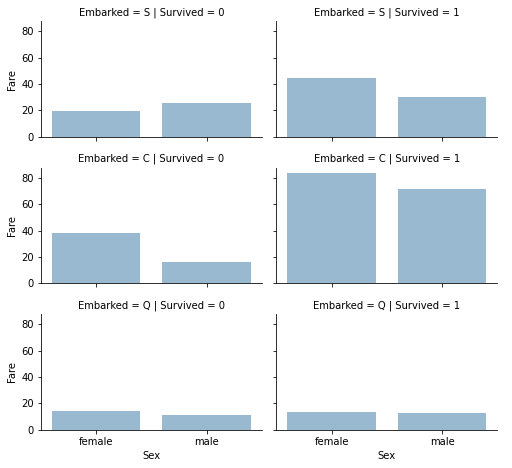

In [26]:
# We can consider correlating Embarked (Categorical non-numeric), Sex (Categorical non-numeric),
# Fare (Numeric continuous), with Survived (Categorical numeric).
grid = sns.FacetGrid(df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

>- Higher fare paying passengers had better survival.
>- Port of embarkation correlates with survival rates.
>***
>- So we can consider banding Fare feature.

# 5. Data Preprocessing

## 5.1 Dropping features

- Ticket feature can be dropped as it contains high ratio of duplicates and there is no correlation between Ticket and survival.
- Cabin feature can be dropped as it is highly incomplete or contains many null values.

In [27]:
df = df.drop(['Ticket', 'Cabin'], axis=1)

In [28]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


## 5.2 Extracting new features

In [29]:
# Name feature can be engineered to extract titles correlation between titles and survival
# we extract Title feature using regular expressions. The RegEx pattern ([A-Za-z]+)\. matches the first
# word which ends with a dot character within Name feature.
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

#pd.crosstab(df['Title'], df['Sex'])

# We can replace many titles with a more common name or classify them as Rare
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col',
'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')
    
# df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

# converting the categorical titles to ordinal
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

df['Title'] = df['Title'].map(title_mapping)
df['Title'] = df['Title'].fillna(0)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [30]:
# dropping name and passengerId
df = df.drop(['Name', 'PassengerId'], axis=1)

## 5.3 Converting a categorical feature

In [31]:
# mapping male to 0 and female to 1
df['Sex'] = df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [32]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


## 5.4 Completing age feature

In [33]:
# preparing an empty array to contain guessed Age values based on Pclass x Gender combinations
guess_ages = np.zeros((2,3))

# we iterate over Sex (0 or 1) and Pclass (1, 2, 3) to calculate guessed values of Age for the six combinations.
for i in range(0, 2):
    for j in range(0, 3):
        guess_df = df[(df['Sex'] == i) & (df['Pclass'] == j+1)]['Age'].dropna()

        age_guess = guess_df.median()

        # Convert random age float to nearest .5 age
        guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
for i in range(0, 2):
    for j in range(0, 3):
        df.loc[ (df.Age.isnull()) & (df.Sex == i) & (df.Pclass == j+1), 'Age'] = guess_ages[i,j]

df['Age'] = df['Age'].astype(int)

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [34]:
# Let us create Age bands and determine correlations with Survived.
df['AgeBand'] = pd.cut(df['Age'], 5)
df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [35]:
# Let us replace Age with ordinals based on these bands.
df.loc[df['Age'] <= 16, 'Age'] = 0
df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 2
df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 3
df.loc[ df['Age'] > 64, 'Age']

df = df.drop(['AgeBand'], axis=1)

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


## 5.5 Completing Embarked feature and converting

In [36]:
#  Our training dataset has two missing values. We simply fill these with the most common occurance.
freq_Embark = df.Embarked.dropna().mode()[0]
df['Embarked'] = df['Embarked'].fillna(freq_Embark)

In [37]:
# Mapping the three values(S, C, Q) to (0, 1, 2) in Embarked
df['Embarked'] = df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,0,1
1,1,1,1,2,1,0,71.2833,1,3
2,1,3,1,1,0,0,7.9250,0,2
3,1,1,1,2,1,0,53.1000,0,3
4,0,3,0,2,0,0,8.0500,0,1


# 6. Building Machine Learning Model

In [38]:
# machine learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

from IPython.display import display

## 6.1 Q1

Run Decision Tree, Naïve Bayes, KNN and ANN algorithms and compare their performances using confusion matrix and other metrics like precision, recall and F-score. Report the training and test errors also. For each classifier, mention the values of various parameters used, wherever applicable.

### 6.1.1 Train Test Split 

Even though our dataset is a little bit imbalance (38.4% Survived and 61.6% not survived), It gives good generalization by using random splitting. Stratified splitting can also be used but doesn't make any difference.

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1), 
                                                    df['Survived'], test_size=0.25, 
                                                    random_state = 42)

In [40]:
#funciton for getting Accuracy, precision, recall and f1_score which returns a list

def get_metrics(y_train, y_train_pred, y_test, y_pred):
  metrics = []

  #Classification report
  report = classification_report(y_test, y_pred, output_dict=True)
  print("Classification Report :")
  pd.options.display.float_format = "{:,.2f}".format
  display(pd.DataFrame(report).transpose())
  pd.reset_option('^display.', silent=True)

  #Accuracy, precision, recall, f1_score
  accuracy = accuracy_score(y_test, y_pred)
  accuracy_train = accuracy_score(y_train, y_train_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  print("\nTraining Set Accuracy : {}\n".format(accuracy_train))
  print("Testing Set Accuracy : {}\n".format(accuracy))
  print("Train error : {}\n".format(1 - accuracy_train))
  print("Test error : {}\n".format(1 - accuracy))
  print("Confusion matrix : \n", confusion_matrix(y_test, y_pred))

  metrics = [accuracy, precision, recall, f1]
  return metrics

### 6.1.2 Decision Tree

In [41]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Predicting test data
y_pred = decision_tree.predict(X_test)
# Predicting training data
y_train_pred = decision_tree.predict(X_train)

decision_tree_metrics = get_metrics(y_train, y_train_pred, y_test, y_pred)

Classification Report :


,precision,recall,f1-score,support
0,0.85,0.83,0.84,134.00
1,0.75,0.79,0.77,89.00
accuracy,0.81,0.81,0.81,0.81
macro avg,0.80,0.81,0.81,223.00
weighted avg,0.81,0.81,0.81,223.00



Training Set Accuracy : 0.9491017964071856

Testing Set Accuracy : 0.8116591928251121

Train error : 0.050898203592814384

Test error : 0.18834080717488788

Confusion matrix : 
 [[111  23]
 [ 19  70]]


### 6.1.3 Naive Bayes

In [42]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

# Predicting test data
y_pred = gaussian.predict(X_test)
# Predicting training data
y_train_pred = gaussian.predict(X_train)

naive_bayes_metrics = get_metrics(y_train, y_train_pred, y_test, y_pred)

Classification Report :


,precision,recall,f1-score,support
0,0.85,0.79,0.82,134.00
1,0.71,0.79,0.75,89.00
accuracy,0.79,0.79,0.79,0.79
macro avg,0.78,0.79,0.78,223.00
weighted avg,0.79,0.79,0.79,223.00



Training Set Accuracy : 0.8068862275449101

Testing Set Accuracy : 0.7892376681614349

Train error : 0.19311377245508987

Test error : 0.21076233183856508

Confusion matrix : 
 [[106  28]
 [ 19  70]]


### 6.1.4 KNN

For KNN, we are finding the best value of k by validating with test data. It gives **k = 6** as the best parrameter. Then trained the model with parameter k = 6 as shown below.

In [43]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 


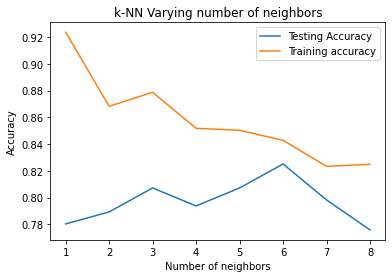

In [44]:
#Generate plot for testing and training Accuracy
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

>- Testing set accuracy is maximum at **k = 6**

In [45]:
# Training model using k = 6
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)

# Predicting test data
y_pred = knn.predict(X_test)
# Predicting training data
y_train_pred = knn.predict(X_train)

knn_metrics = get_metrics(y_train, y_train_pred, y_test, y_pred)

Classification Report :


,precision,recall,f1-score,support
0,0.84,0.87,0.86,134.00
1,0.80,0.75,0.77,89.00
accuracy,0.83,0.83,0.83,0.83
macro avg,0.82,0.81,0.82,223.00
weighted avg,0.82,0.83,0.82,223.00



Training Set Accuracy : 0.842814371257485

Testing Set Accuracy : 0.8251121076233184

Train error : 0.15718562874251496

Test error : 0.17488789237668156

Confusion matrix : 
 [[117  17]
 [ 22  67]]


### 6.1.5 ANN

>- Here I am using a 3 layer Aritificial Neural Network

>- Since the input contains only 8 features, so no of neurons in input layer = 8.


>- No of neurons in hidden layer = 6


>- Since it is binary classification problem, we need to concider only yes or no case, so no of neurons in output layer = 1.

>- Activation function used here is sigmoid function












In [46]:
# sequential model to initialise our ann and dense module to build the layers
from keras.models import Sequential
from keras.layers import Dense

In [47]:
classifier = Sequential()

# Adding the hidden layer
classifier.add(Dense(units = 6, input_dim = 8, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Adding the output layer
classifier.add(Dense(units = 1, input_dim = 6, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN | means applying SGD on the whole ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history = classifier.fit(X_train, y_train, validation_split = 0.2, batch_size = 10, epochs = 100,verbose = 0)

score, acc = classifier.evaluate(X_train, y_train,
                            batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Predicting the Train set results
y_train_pred = classifier.predict(X_train)
y_train_pred = (y_train_pred > 0.5)

print('*'*20)
score, acc = classifier.evaluate(X_test, y_test,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)

67/67 [==============================] - 0s 978us/step - loss: 0.4461 - accuracy: 0.8099
Train score: 0.4461170732975006
Train accuracy: 0.809880256652832
********************
23/23 [==============================] - 0s 1ms/step - loss: 0.4482 - accuracy: 0.7758
Test score: 0.4481598436832428
Test accuracy: 0.7757847309112549


In [48]:
ann_metrics = get_metrics(y_train, y_train_pred, y_test, y_pred)

Classification Report :


,precision,recall,f1-score,support
0,0.82,0.80,0.81,134.00
1,0.71,0.74,0.73,89.00
accuracy,0.78,0.78,0.78,0.78
macro avg,0.77,0.77,0.77,223.00
weighted avg,0.78,0.78,0.78,223.00



Training Set Accuracy : 0.8098802395209581

Testing Set Accuracy : 0.7757847533632287

Train error : 0.1901197604790419

Test error : 0.22421524663677128

Confusion matrix : 
 [[107  27]
 [ 23  66]]


The below snippet plots the graph of the training loss vs. validation loss over the number of epochs.

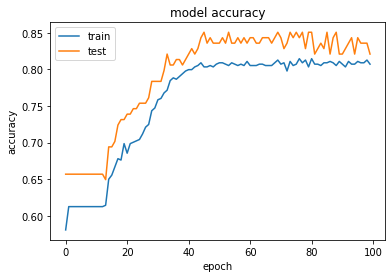

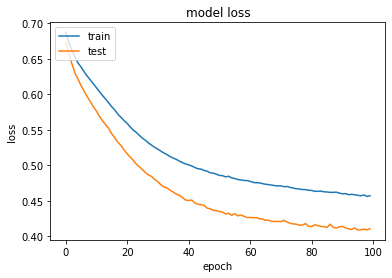

In [49]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 6.1.6 Model Comaprison

In [50]:
data = {'Decision Tree':decision_tree_metrics,
        'Naive Bayes': naive_bayes_metrics,
        'KNN' : knn_metrics,
        'ANN' : ann_metrics}
pd.DataFrame(data, index =['Accuracy','Precision','Recall','F1 Score'])

,Decision Tree,Naive Bayes,KNN,ANN
Accuracy,0.811659,0.789238,0.825112,0.775785
Precision,0.752688,0.714286,0.797619,0.709677
Recall,0.786517,0.786517,0.752809,0.741573
F1 Score,0.769231,0.748663,0.774566,0.725275


>- KNN has higher Accuracy, Precision, F1_score as compared to other models
>- Naive Bayes and decison tree has highest Recall
>- Overall, KNN feels the best model

## 6.2 Q2

For ANN plot the loss function values against epochs. Compare the performance
of ANN with any three different activation functions. What are your inferences?

### 6.2.1 Defining functions for ANN modeling and plotting

In [51]:
# Function to create and train ANN model with given activation function in hidden Layers
# Function returns trained model and loss_history
def ANN_model_creator(X_train, y_train, activ):
  
  ANN_model = Sequential()

  #Adding hidden layers
  ANN_model.add(Dense(6, input_dim=8, activation=activ))

  #Adding output layer
  ANN_model.add(Dense(1, input_dim=6, activation='sigmoid'))

  #Compile the model
  ANN_model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

  history = ANN_model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=0)
  return ANN_model, history

In [52]:
#Function to plot loss-epoch Graph
def loss_epoch_plot(history, title):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Loss vs Epoch for '+ title)
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

### 6.2.2 ANN using relu activation function

Activation functions like relu, tanh and sigmoid are going to be tested in hidden layers.

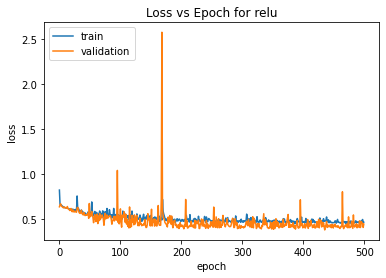

Classification Report :


,precision,recall,f1-score,support
0,0.75,0.87,0.80,134.00
1,0.74,0.56,0.64,89.00
accuracy,0.74,0.74,0.74,0.74
macro avg,0.74,0.71,0.72,223.00
weighted avg,0.74,0.74,0.74,223.00



Training Set Accuracy : 0.781437125748503

Testing Set Accuracy : 0.7443946188340808

Train error : 0.218562874251497

Test error : 0.25560538116591924

Confusion matrix : 
 [[116  18]
 [ 39  50]]


In [53]:
## ANN with relu activation function
ANN_model_relu, history_relu = ANN_model_creator(X_train, y_train, activ="relu")

loss_epoch_plot(history_relu, "relu")

y_pred_ANN_relu = ANN_model_relu.predict(X_test)
y_pred_ANN_relu_train = ANN_model_relu.predict(X_train)

y_pred_ANN_relu = (y_pred_ANN_relu > 0.5)
y_pred_ANN_relu_train = (y_pred_ANN_relu_train > 0.5)

relu_metrics = get_metrics(y_train, y_pred_ANN_relu_train, y_test, y_pred_ANN_relu)

### 6.2.3 ANN using tanh activation function

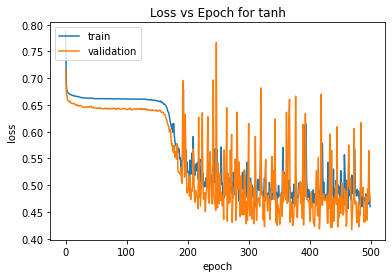

Classification Report :


,precision,recall,f1-score,support
0,0.87,0.76,0.81,134.00
1,0.70,0.83,0.76,89.00
accuracy,0.79,0.79,0.79,0.79
macro avg,0.78,0.80,0.79,223.00
weighted avg,0.80,0.79,0.79,223.00



Training Set Accuracy : 0.7979041916167665

Testing Set Accuracy : 0.7892376681614349

Train error : 0.2020958083832335

Test error : 0.21076233183856508

Confusion matrix : 
 [[102  32]
 [ 15  74]]


In [54]:
## ANN with tanh activation function

ANN_model_tanh, history_tanh = ANN_model_creator(X_train, y_train, activ="tanh")

loss_epoch_plot(history_tanh, "tanh")

y_pred_ANN_tanh = ANN_model_tanh.predict(X_test)
y_pred_ANN_tanh_train = ANN_model_tanh.predict(X_train)

y_pred_ANN_tanh = (y_pred_ANN_tanh > 0.5)
y_pred_ANN_tanh_train = (y_pred_ANN_tanh_train > 0.5)

tanh_metrics = get_metrics(y_train, y_pred_ANN_tanh_train, y_test, y_pred_ANN_tanh)

### 6.2.4 ANN using sigmoid activation function

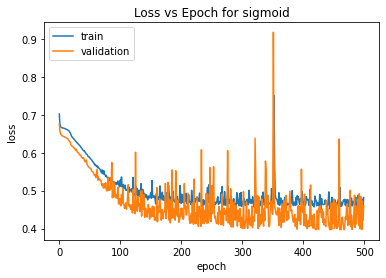

Classification Report :


,precision,recall,f1-score,support
0,0.87,0.75,0.81,134.00
1,0.69,0.83,0.76,89.00
accuracy,0.78,0.78,0.78,0.78
macro avg,0.78,0.79,0.78,223.00
weighted avg,0.80,0.78,0.79,223.00



Training Set Accuracy : 0.8023952095808383

Testing Set Accuracy : 0.7847533632286996

Train error : 0.19760479041916168

Test error : 0.2152466367713004

Confusion matrix : 
 [[101  33]
 [ 15  74]]


In [55]:
## ANN with sigmoid activation function

ANN_model_sigmoid, history_sigmoid = ANN_model_creator(X_train, y_train, activ="sigmoid")

loss_epoch_plot(history_sigmoid, "sigmoid")

y_pred_ANN_sigmoid = ANN_model_sigmoid.predict(X_test)
y_pred_ANN_sigmoid_train = ANN_model_sigmoid.predict(X_train)

y_pred_ANN_sigmoid = (y_pred_ANN_sigmoid > 0.5)
y_pred_ANN_sigmoid_train = (y_pred_ANN_sigmoid_train > 0.5)

sigmoid_metrics = get_metrics(y_train, y_pred_ANN_sigmoid_train, y_test, y_pred_ANN_sigmoid)

### 6.2.5 Comparison between Relu, tanh and sigmoid

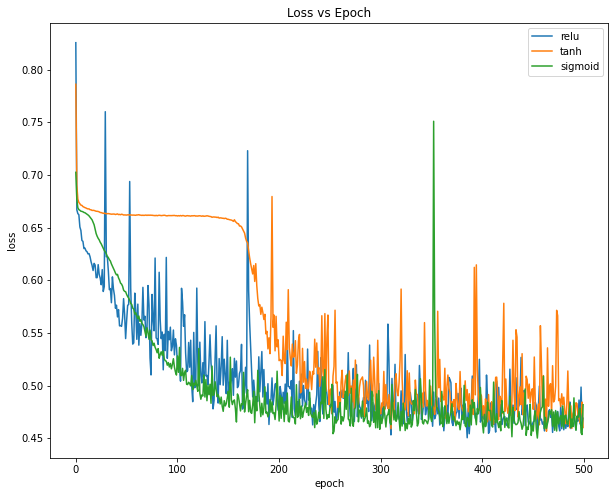

In [56]:
## Comparison of Model Performance
plt.figure(figsize = (10,8))
plt.plot(history_relu.history['loss'])
plt.plot(history_tanh.history['loss'])
plt.plot(history_sigmoid.history['loss'])
plt.title('Loss vs Epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['relu', 'tanh', 'sigmoid'], loc='upper right')
plt.show()

>- It can be observed that the loss epoch curve for three figures are converging quickly.
>- From the above figure, we can observe that the sigmoid is converging to minimum loss as compared to relu and tanh

## 6.3 Q3

In case of ANN, plot the test set error for different numbers of hidden nodes, like
1, 2, 3, square root of number of features, and half of the number of features. Compare
the results and what inference you can make from this.

### 6.3.1 Defining function for ANN modeling

In [57]:
# Function to create and train ANN model with given hidden units numbers
# Function returns the test set error

def ANN_varying_hidden_nodes(X_train, y_train, X_test, y_test, hidden_units):
  
  ANN_model = Sequential()

  #Adding hidden layers
  ANN_model.add(Dense(hidden_units, input_dim=8, activation='sigmoid'))

  #Adding output layer
  ANN_model.add(Dense(1, input_dim=hidden_units, activation='sigmoid'))

  #Compile the model
  ANN_model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

  ANN_model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=0)

  #Predicting 
  y_pred = ANN_model.predict(X_test)
  y_pred = (y_pred > 0.5)

  test_error = 1 - accuracy_score(y_test, y_pred)
  return test_error

### 6.3.2 Finding test error for varying hidden nodes

> - The no of features present in my dataset = 8
> - So iam going to experiment with no of hidden units ranging from 1 to 8


In [58]:
#List for storing test_set_error
test_set_error = []

# adding test_error values to test_set_error for varying no of hidden units
for i in range(1,9):
    test_set_error.append(ANN_varying_hidden_nodes(X_train, y_train, X_test, y_test, i))

### 6.3.3 Plotting No of hidden units VS Test Set Accuracy graph

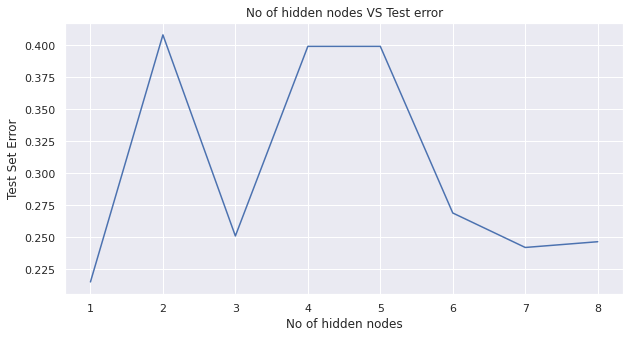

In [59]:
sns.set_theme(style="darkgrid")

x = [1, 2, 3, 4, 5, 6, 7, 8]
y = test_set_error

plt.subplots(figsize=(10, 5))
ax = sns.lineplot(x, y)
ax.set(xlabel='No of hidden nodes', ylabel='Test Set Error')
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.title('No of hidden nodes VS Test error')
plt.show()

> **Inference**
>- The test set error is maximum for hidden unit values = 2.
>- Test set error reaches minima at `x = 3`
>- There is high variation for `x > 4.`
>- So I concluded that the no of neurons for a hidden node required is only near to half of the no of features. 

## 6.4 Q4

Start with your original cleaned dataset. Now create three datasets, D1, D2 and D3
containing 1/4, 2/4, and 3/4 portions of samples from the original dataset. Now create
your training and test datasets and repeat Q1. Compare the results obtained for D1,
D2, D3 and D. Give your inferences with justifications

### 6.4.1 Creating Smaller Dataset

>- D1 = 1/4th of Dataset
>- D2 = 1/2th of Dataset
>- D3 = 3/4th of Dataset
>- D = Complete Dataset

In [60]:
print("Shape of D : ",df.shape)

D1 = df.sample(frac=0.25, replace= False)
print("Shape of D1 : ",D1.shape)

D2 = df.sample(frac=0.5, replace= False)
print("Shape of D1 : ",D2.shape)

D3 = df.sample(frac=0.75, replace= False)
print("Shape of D3 : ",D3.shape)

Shape of D :  (891, 9)
Shape of D1 :  (223, 9)
Shape of D1 :  (446, 9)
Shape of D3 :  (668, 9)


### 6.4.2 Train Test Splitting

In [61]:
# Splitting D1
D1_X_train, D1_X_test, D1_y_train, D1_y_test = train_test_split(D1.drop('Survived',axis=1), 
                                                    D1['Survived'], test_size=0.25, 
                                                    random_state = 42)
# Splitting D2
D2_X_train, D2_X_test, D2_y_train, D2_y_test = train_test_split(D2.drop('Survived',axis=1), 
                                                    D2['Survived'], test_size=0.25, 
                                                    random_state = 42)
# Splitting D3
D3_X_train, D3_X_test, D3_y_train, D3_y_test = train_test_split(D3.drop('Survived',axis=1), 
                                                    D3['Survived'], test_size=0.25, 
                                                    random_state = 42)

### 6.4.3 Functions for Evaluation metrics and generating graph

In [66]:
# Function for returning some metrics like accuracy, precision, recall etc.

def evaluation_metrics(y_train, y_train_pred, y_test, y_pred):
  metrics = {}

  metrics['accuracy'] = accuracy_score(y_test, y_pred)
  metrics['precision'] = precision_score(y_test, y_pred)
  metrics['recall'] = recall_score(y_test, y_pred)
  metrics['f1_score'] = f1_score(y_test, y_pred)

  metrics['train_error']= 1 - accuracy_score(y_train, y_train_pred)
  metrics['test_error'] = 1 - metrics['accuracy']

  return metrics

In [108]:
# Function for generating plots for comparing the perfomance of models by using different datasets
# Function takes the evaluation metrics of D1, D2, D3 and D as the arguments

def generate_plot(m1, m2, m3, m4, title):
  # creating list for accuracy, precision, recall etc.
  accuracy = [m1['accuracy'], m2['accuracy'], m3['accuracy'], m4['accuracy']]
  precision = [m1['precision'], m2['precision'], m3['precision'], m4['precision']]
  recall = [m1['recall'], m2['recall'], m3['recall'], m4['recall']]
  f1_score = [m1['f1_score'], m2['f1_score'], m3['f1_score'], m4['f1_score']]
  train_error = [m1['train_error'], m2['train_error'], m3['train_error'], m4['train_error']]
  test_error = [m1['test_error'], m2['test_error'], m3['test_error'], m4['test_error']]

  dataset_label = ['D1','D2','D3','D']

  # converting to pandas dataframe
  data_accuracy = {"Dataset": dataset_label, "Accuracy": accuracy}
  df_accuracy = pd.DataFrame(data_accuracy)

  data_precision = {"Dataset": dataset_label, "Precision": precision}
  df_precision = pd.DataFrame(data_precision)

  data_recall = {"Dataset": dataset_label, "Recall": recall}
  df_recall = pd.DataFrame(data_recall)

  data_f1_score = {"Dataset": dataset_label, "F1_Score": f1_score}
  df_f1_score = pd.DataFrame(data_f1_score)

  data_train_error = {"Dataset": dataset_label, "Train_Error": train_error}
  df_train_error = pd.DataFrame(data_train_error)

  data_test_error = {"Dataset": dataset_label, "Test_Error": test_error}
  df_test_error = pd.DataFrame(data_test_error)

  # Plotting
  fig, axes = plt.subplots(2, 3, sharex=True, figsize=(16,8))
  fig.suptitle(title)

  sns.lineplot(ax=axes[0, 0], data=df_accuracy, x='Dataset', y='Accuracy')
  sns.lineplot(ax=axes[0, 1], data=df_precision, x='Dataset', y='Precision')
  sns.lineplot(ax=axes[0, 2], data=df_recall, x='Dataset', y='Recall')
  sns.lineplot(ax=axes[1, 0], data=df_f1_score, x='Dataset', y='F1_Score')
  sns.lineplot(ax=axes[1, 1], data=df_train_error, x='Dataset', y='Train_Error')
  sns.lineplot(ax=axes[1, 2], data=df_test_error, x='Dataset', y='Test_Error')

### 6.4.4 Decision Tree

In [67]:
# Decision tree model which returns the evaluation metrics after training the model

def decision_tree_model(X_train, y_train, X_test, y_test):
  decision_tree = DecisionTreeClassifier()
  decision_tree.fit(X_train, y_train)

  # Predicting test data
  y_pred = decision_tree.predict(X_test)
  # Predicting training data
  y_train_pred = decision_tree.predict(X_train)

  return evaluation_metrics(y_train, y_train_pred, y_test, y_pred)

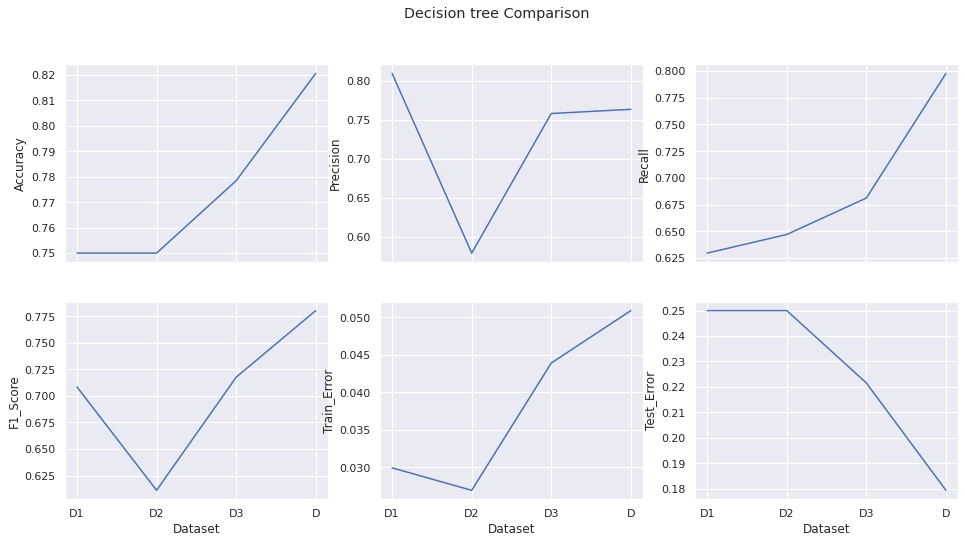

In [105]:
# Obtaining evaluation metrics for D1, D2, D3, D datasets for decision tree and plotting

D1_decision_metrics = decision_tree_model(D1_X_train, D1_y_train, D1_X_test, D1_y_test)
D2_decision_metrics = decision_tree_model(D2_X_train, D2_y_train, D2_X_test, D2_y_test)
D3_decision_metrics = decision_tree_model(D3_X_train, D3_y_train, D3_X_test, D3_y_test)
D_decision_metrics = decision_tree_model(X_train, y_train, X_test, y_test)

generate_plot(D1_decision_metrics, D2_decision_metrics, D3_decision_metrics, D_decision_metrics, 'Decision Tree Comparison')

> **Inference for decision tree**
>- As the dataset size increases, Accuracy, Recall, F1_Score, Train Errors are increasing.
>- Precision decreases for first half, Then increased
>- Also the error in test set also decreases drastically when dataset size increases.
>- It is evident that as the model sees more samples and it can learn more in a generalized manner, So It can perform better.

### 6.4.5 Naive Bayes

In [113]:
# Naive Bayes model which returns the evaluation metrics after training the model

def Naive_Bayes_Model(X_train, y_train, X_test, y_test):
  gaussian = GaussianNB()
  gaussian.fit(X_train, y_train)

  # Predicting test data
  y_pred = gaussian.predict(X_test)
  # Predicting training data
  y_train_pred = gaussian.predict(X_train)

  return evaluation_metrics(y_train, y_train_pred, y_test, y_pred)

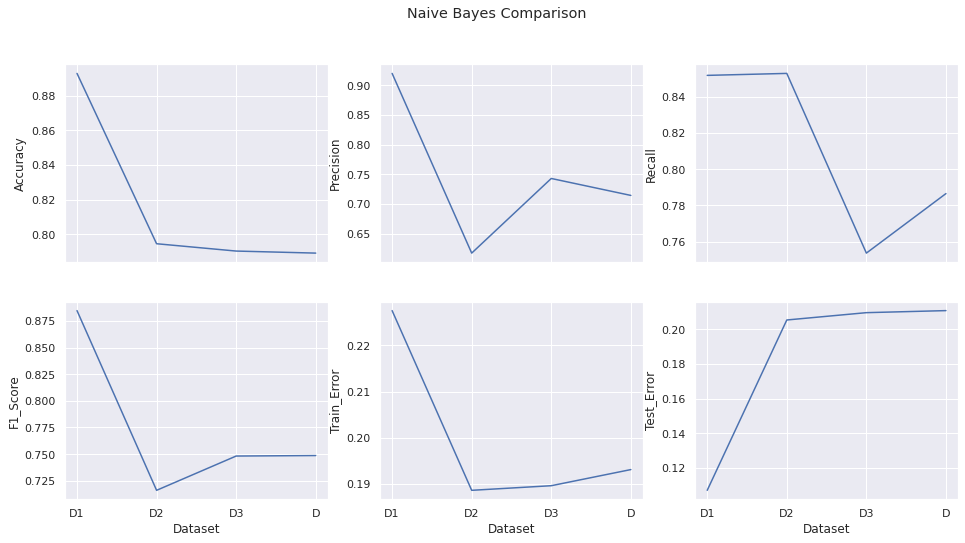

In [114]:
# Obtaining evaluation metrics for D1, D2, D3, D datasets for Naive Bayes and plotting

D1_Naive_metrics = Naive_Bayes_Model(D1_X_train, D1_y_train, D1_X_test, D1_y_test)
D2_Naive_metrics = Naive_Bayes_Model(D2_X_train, D2_y_train, D2_X_test, D2_y_test)
D3_Naive_metrics = Naive_Bayes_Model(D3_X_train, D3_y_train, D3_X_test, D3_y_test)
D_Naive_metrics = Naive_Bayes_Model(X_train, y_train, X_test, y_test)

generate_plot(D1_Naive_metrics, D2_Naive_metrics, D3_Naive_metrics, D_Naive_metrics, 'Naive Bayes Comparison')

> **Inference for Naive Bayes**
>- unexpectedly, error in the model is increasing as samples increases.
>- Precision, Recall, F1_Score, Accuracy are decreasing with increase in dataset size.

### 6.4.6 KNN

In [116]:
# KNN model which returns the evaluation metrics after training the model

def KNN_Model(X_train, y_train, X_test, y_test):
  knn = KNeighborsClassifier(n_neighbors = 6)
  knn.fit(X_train, y_train)

  # Predicting test data
  y_pred = knn.predict(X_test)
  # Predicting training data
  y_train_pred = knn.predict(X_train)

  return evaluation_metrics(y_train, y_train_pred, y_test, y_pred)

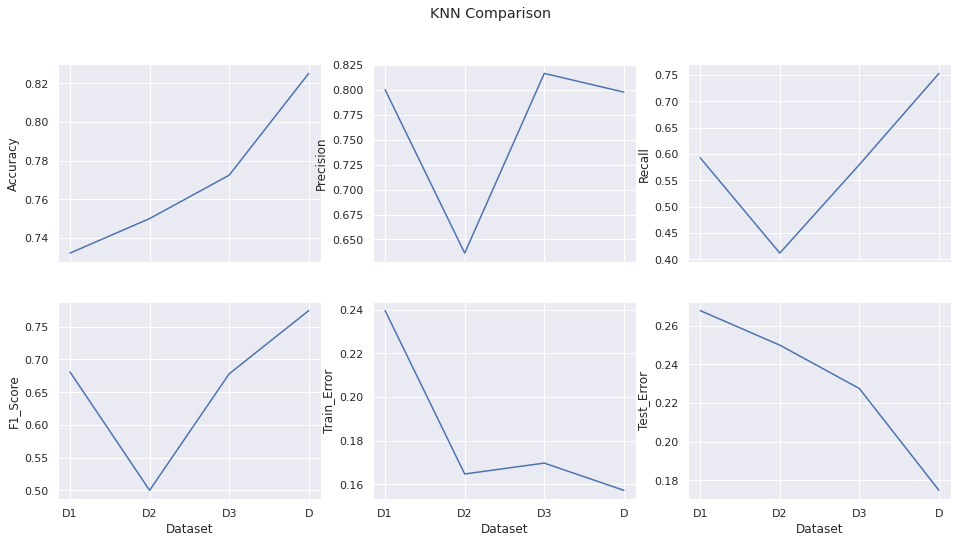

In [117]:
# Obtaining evaluation metrics for D1, D2, D3, D datasets for KNN and plotting

D1_KNN_metrics = KNN_Model(D1_X_train, D1_y_train, D1_X_test, D1_y_test)
D2_KNN_metrics = KNN_Model(D2_X_train, D2_y_train, D2_X_test, D2_y_test)
D3_KNN_metrics = KNN_Model(D3_X_train, D3_y_train, D3_X_test, D3_y_test)
D_KNN_metrics = KNN_Model(X_train, y_train, X_test, y_test)

generate_plot(D1_KNN_metrics, D2_KNN_metrics, D3_KNN_metrics, D_KNN_metrics, 'KNN Comparison')

> **Inference for KNN**
>- Accuracy, precision, Recall, F1_Score increases with dataset size as expected
>- Train error and test error both simultaneously going to it's minimum position as dataset size increases. 
>- For D2 dataset, The F1_Score and Precision are lower as compared to previous Dataset.

### 6.4.7 ANN

In [120]:
# ANN model which returns the evaluation metrics after training the model

def ANN_Model(X_train, y_train, X_test, y_test):
  classifier = Sequential()

  # Adding the hidden layer
  classifier.add(Dense(units = 6, input_dim = 8, kernel_initializer = 'uniform', activation = 'sigmoid'))

  # Adding the output layer
  classifier.add(Dense(units = 1, input_dim = 6, kernel_initializer = 'uniform', activation = 'sigmoid'))

  # Compiling the ANN | means applying SGD on the whole ANN
  classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

  # Fitting the ANN to the Training set
  history = classifier.fit(X_train, y_train, validation_split = 0.2, batch_size = 10, epochs = 100,verbose = 0)

  # Predicting the Test set results
  y_pred = classifier.predict(X_test)
  y_pred = (y_pred > 0.5)

  # Predicting the Train set results
  y_train_pred = classifier.predict(X_train)
  y_train_pred = (y_train_pred > 0.5)
  
  return evaluation_metrics(y_train, y_train_pred, y_test, y_pred)

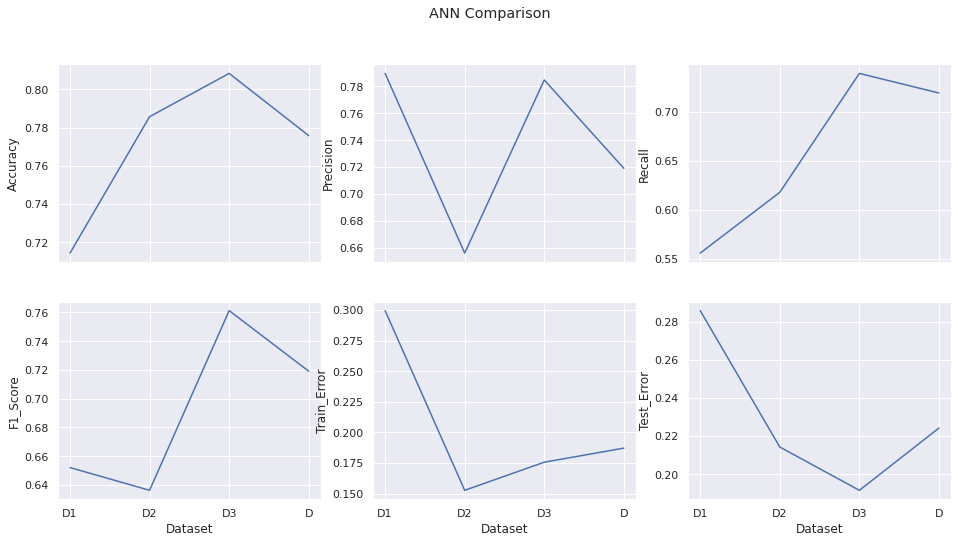

In [121]:
# Obtaining evaluation metrics for D1, D2, D3, D datasets for ANN and plotting

D1_ANN_metrics = ANN_Model(D1_X_train, D1_y_train, D1_X_test, D1_y_test)
D2_ANN_metrics = ANN_Model(D2_X_train, D2_y_train, D2_X_test, D2_y_test)
D3_ANN_metrics = ANN_Model(D3_X_train, D3_y_train, D3_X_test, D3_y_test)
D_ANN_metrics = ANN_Model(X_train, y_train, X_test, y_test)

generate_plot(D1_ANN_metrics, D2_ANN_metrics, D3_ANN_metrics, D_ANN_metrics, 'ANN Comparison')

> **Inference for ANN**
>- The usual pattern of increase in Accuracy, Recall etc can also be seen here.
>- But Here, Our ANN shows best perfomance for dataset D3 which have the maximum accuracy, Recall, F1_Score. Also least testing and training error